In [5]:
import numpy as np
import pandas as pd
import io


In [6]:
from google.colab import files
upload = files.upload()

Saving data.csv to data (1).csv


In [7]:
df= pd.read_csv(io.BytesIO(upload['data (1).csv']))

In [8]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


# Assumtion 1: There should be Linear relationship between input and output columns

In [12]:
import matplotlib.pyplot as plt

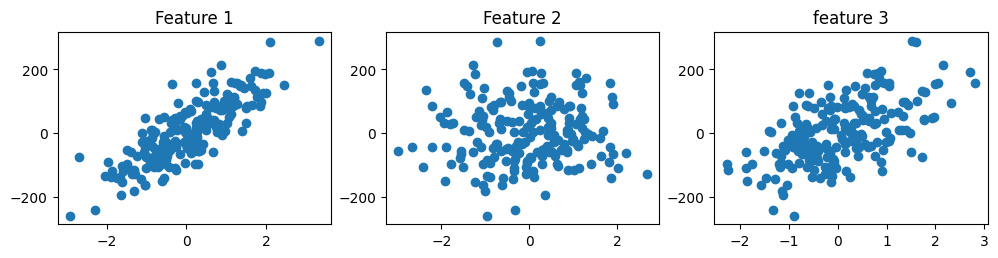

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.set_title("Feature 1")
ax1.scatter(df['feature1'],df['target'])
ax2.set_title("Feature 2")
ax2.scatter(df['feature2'],df['target'])
ax3.set_title("feature 3")
ax3.scatter(df['feature3'],df['target'])

## Assumption 2 : There should be no mulitcollinearity between columns

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [26]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.014345,1.000436,1.013915


<Axes: >

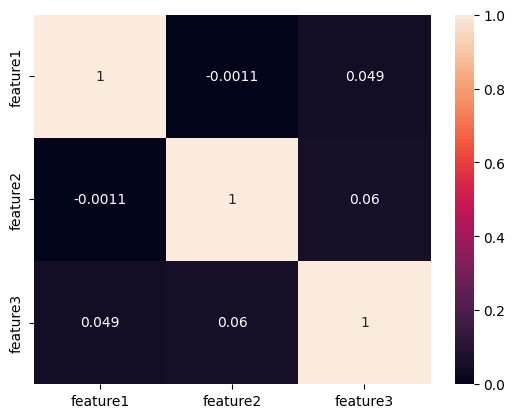

In [29]:
import seaborn as sns

sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state =4)

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test)

## Assumption 3 : There should be Uniform distribution of the Residuals

In [30]:
residuals = y_test - y_pred

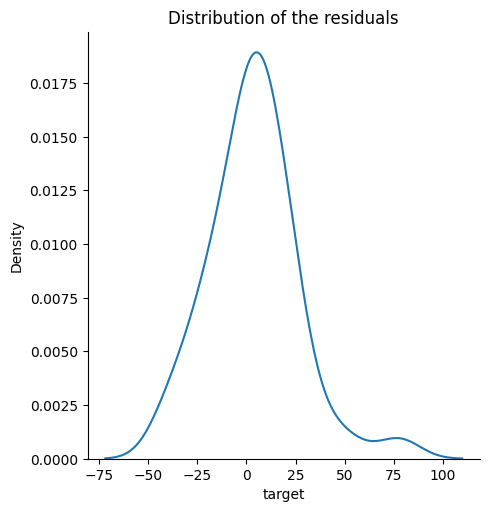

In [33]:
sns.displot(residuals ,kind ="kde")
plt.title("Distribution of the residuals")
plt.show()

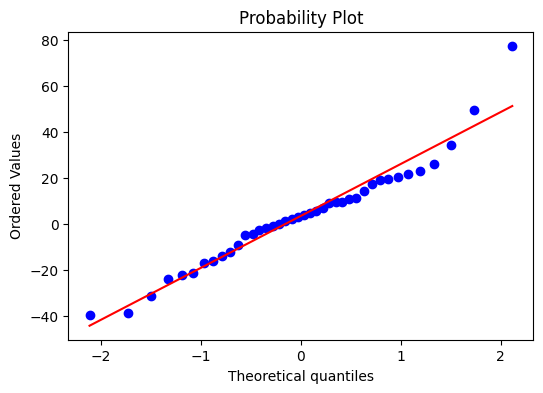

In [34]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residuals, plot=ax, fit=True)

plt.show()

## Assumption 3 :Homoscedasticity : if wwe plot the scatter plot betwween y_prediction and the residulas then it sholud spread equlas onn both the axis (X & Y)

Text(0, 0.5, 'Residulas')

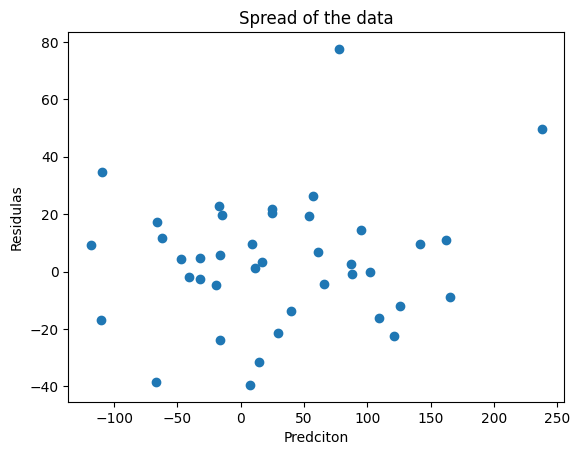

In [36]:
plt.title("Spread of the data")
plt.scatter(y_pred ,residuals)
plt.xlabel("Predciton")
plt.ylabel("Residulas")

## Assumkption 3 : No Autocorrelation of error :neaning there should not form any pattern if we plot the residulas graph : there sholud be no correlation between erros

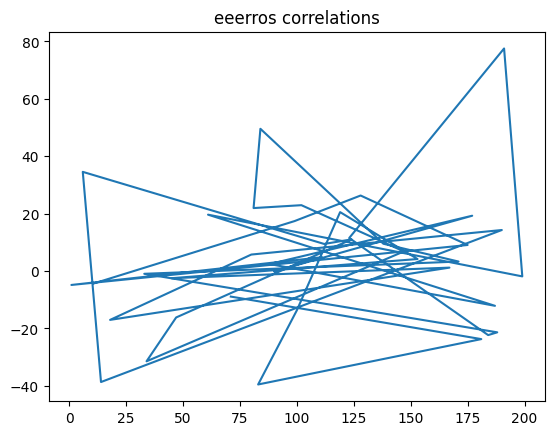

In [38]:
plt.title("eeerros correlations")
plt.plot(residuals)
plt.show()